In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-rated-tv-series-dataset/IMDb Top TV Series.csv


In [2]:
df=pd.read_csv('/kaggle/input/imdb-top-rated-tv-series-dataset/IMDb Top TV Series.csv')
df

,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,1. Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,3. Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,4. Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,5. The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...
895,896. Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two..."
896,897. Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...
897,898. How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...
898,899. Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow..."


## Data Cleaning

In [3]:
import re


In [4]:
# Remove numerical prefixes from titles
df['Title'] = df['Title'].apply(lambda x: re.sub(r'^\d+\.\s*', '', x))

In [5]:
df

,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...
895,Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two..."
896,Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...
897,How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...
898,Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow..."


## Basic Data Exploring

In [6]:
print(df.describe())

           Rating
count  900.000000
mean     7.862333
std      0.817776
min      1.600000
25%      7.500000
50%      8.000000
75%      8.400000
max      9.500000


In [7]:
print(df.isna().sum())

Title               0
Year               12
Parental Rating    12
Rating              0
Number of Votes     0
Description         0
dtype: int64


In [8]:
# Reset DataFrame indices after dropping null values
df = df.dropna().reset_index(drop=True)


In [9]:
print(df.isna().sum())

Title              0
Year               0
Parental Rating    0
Rating             0
Number of Votes    0
Description        0
dtype: int64


In [10]:
df

,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...
883,Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two..."
884,Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...
885,How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...
886,Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            888 non-null    object 
 1   Year             888 non-null    object 
 2   Parental Rating  888 non-null    object 
 3   Rating           888 non-null    float64
 4   Number of Votes  888 non-null    object 
 5   Description      888 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.8+ KB


## Data Visualisation

In [12]:
import warnings
warnings.filterwarnings("ignore")

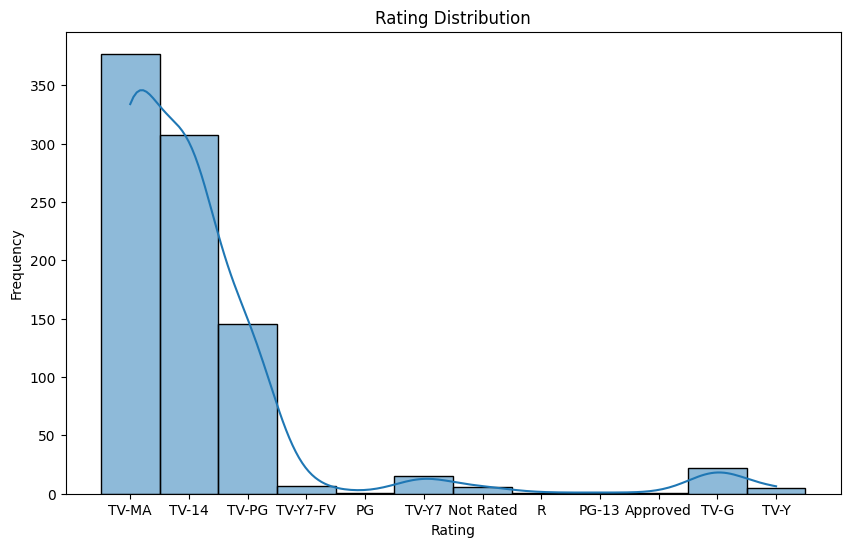

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Parental Rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



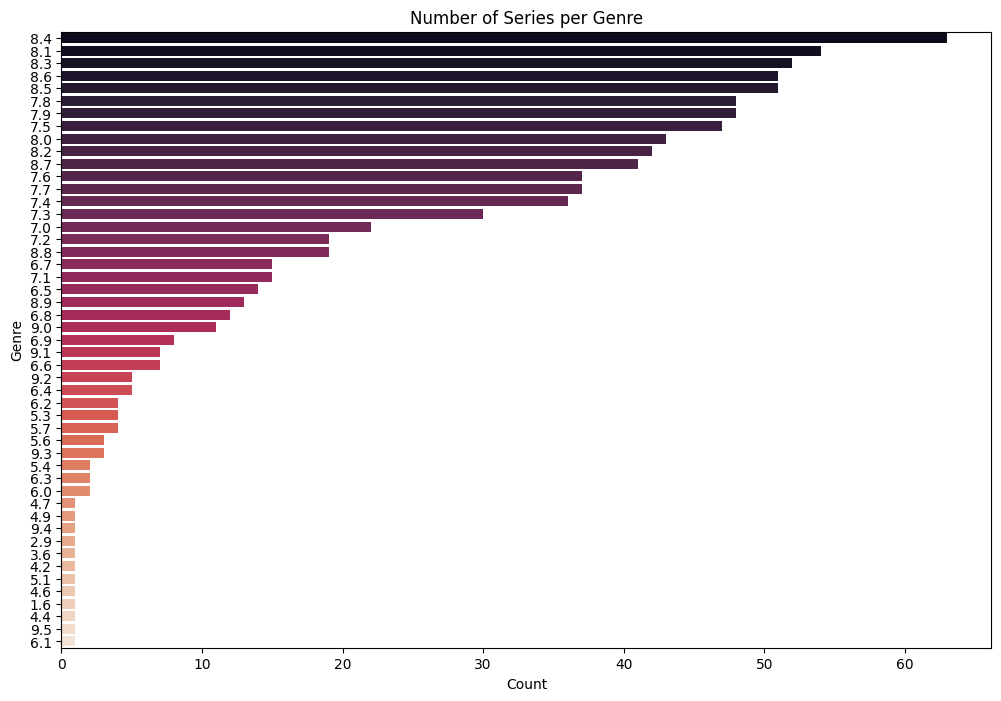

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Rating', data=df, palette='rocket', order=df['Rating'].value_counts().index)
plt.title('Number of Series per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [15]:
df

,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...
883,Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two..."
884,Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...
885,How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...
886,Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow..."


In [16]:
# Combine relevant features into a single string
df['combined_features'] = df['Description'] + ' ' + df['Parental Rating']

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
# Vectorize the combined features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

In [19]:
tfidf_matrix

<888x5012 sparse matrix of type '<class 'numpy.float64'>'
	with 14213 stored elements in Compressed Sparse Row format>

In [20]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [22]:
cosine_sim

array([[1.        , 0.00891969, 0.00230462, ..., 0.00212314, 0.009404  ,
        0.0621341 ],
       [0.00891969, 1.        , 0.00187634, ..., 0.00172858, 0.0076564 ,
        0.00166171],
       [0.00230462, 0.00187634, 1.        , ..., 0.01001341, 0.00197822,
        0.00962604],
       ...,
       [0.00212314, 0.00172858, 0.01001341, ..., 1.        , 0.00182244,
        0.00886802],
       [0.009404  , 0.0076564 , 0.00197822, ..., 0.00182244, 1.        ,
        0.00175194],
       [0.0621341 , 0.00166171, 0.00962604, ..., 0.00886802, 0.00175194,
        1.        ]])

In [23]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

indices

Title
Game of Thrones            0
Breaking Bad               1
Stranger Things            2
Friends                    3
The Walking Dead           4
                        ... 
Lockwood & Co.           883
Batman                   884
How I Met Your Father    885
Delhi Crime              886
Caprica                  887
Length: 888, dtype: int64

In [24]:
print(df['Title'])
print(df.index)


0            Game of Thrones
1               Breaking Bad
2            Stranger Things
3                    Friends
4           The Walking Dead
               ...          
883           Lockwood & Co.
884                   Batman
885    How I Met Your Father
886              Delhi Crime
887                  Caprica
Name: Title, Length: 888, dtype: object
RangeIndex(start=0, stop=888, step=1)


In [25]:
df

,Title,Year,Parental Rating,Rating,Number of Votes,Description,combined_features
0,Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...,Nine noble families fight for control over the...
1,Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...,A chemistry teacher diagnosed with inoperable ...
2,Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove...","When a young boy vanishes, a small town uncove..."
3,Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...,Follows the personal and professional lives of...
4,The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...,...
883,Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two...","Lucy, a girl with psychic abilities, joins two..."
884,Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...,The Caped Crusader and his young ward battle e...
885,How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...,Sophie and her close-knit group of friends are...
886,Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow...","Based on the Nirbhaya case, Delhi Crime follow..."


In [26]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Convert title to lowercase for case-insensitive comparison
    title_lower = title.lower()
    
    # Check if the title exists in the DataFrame
    if title_lower not in df['Title'].str.lower().values:
        return f"Title '{title}' not found in the dataset."
    
    # Get the index of the TV series that matches the title
    idx = df[df['Title'].str.lower() == title_lower].index[0]

    # Get the pairwise similarity scores of all TV series with that TV series
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the TV series based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar TV series
    sim_scores = sim_scores[1:11]

    # Get the TV series indices
    tv_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar TV series
    return df['Title'].iloc[tv_indices]

In [27]:
# Example usage
print(get_recommendations('Friends'))

348     Master of None
680        Ally McBeal
483          The Knick
744          The Deuce
316    Ginny & Georgia
389       Chicago Fire
58      Grey's Anatomy
53            Seinfeld
692         Broad City
430        Derry Girls
Name: Title, dtype: object
